In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# Load the dataset
df = pd.read_csv('GOOGL.csv')

In [3]:
# Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

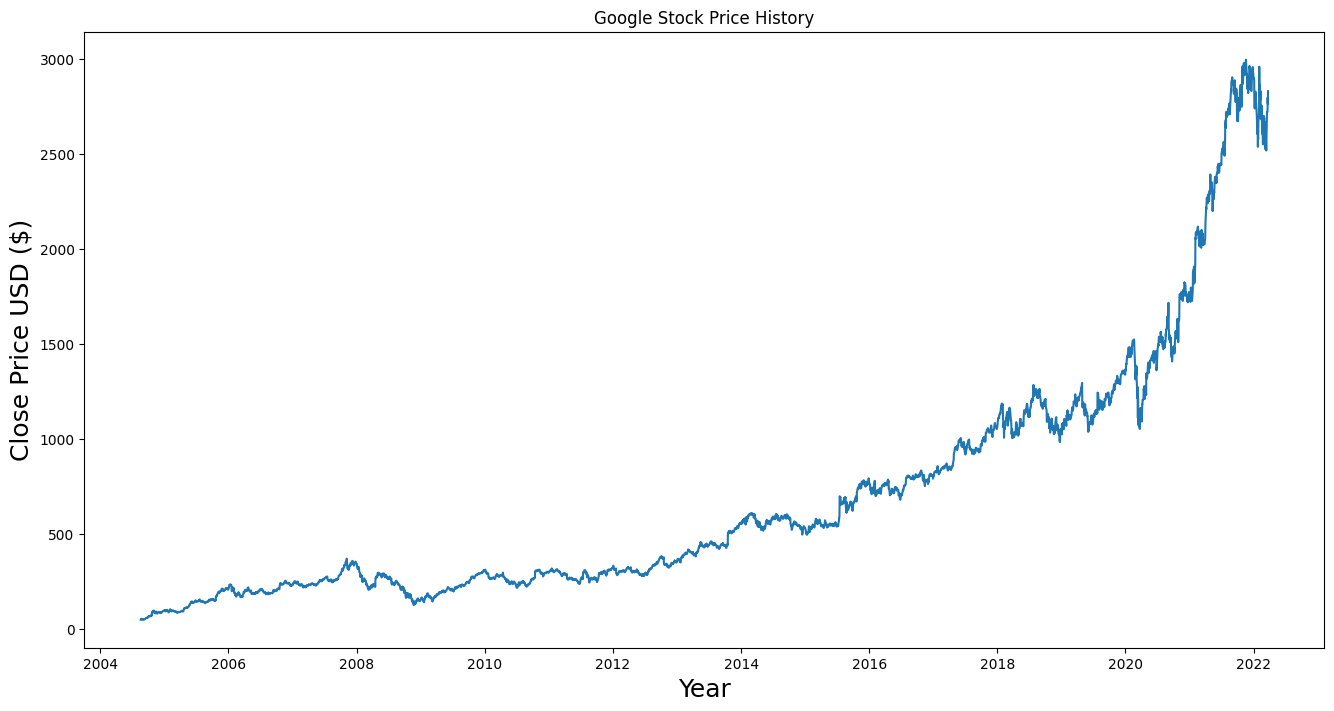

In [4]:
# Visualize the dataset
plt.figure(figsize=(16,8))
plt.title('Google Stock Price History')
plt.plot(df['Close'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

In [6]:
# Convert the dataframe to a numpy array
dataset = data.values

In [7]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil(0.8 * len(dataset)))

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [9]:
# Create the training data
train_data = scaled_data[0:training_data_len, :]

In [11]:
# Define time_steps
time_steps = 30

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, 0])
    y_train.append(train_data[i, 0])

In [12]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
# Reshape the data for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [14]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
3515/3515 [==============================] - 55s 14ms/step - loss: 1.6706e-04
Epoch 2/5
3515/3515 [==============================] - 49s 14ms/step - loss: 7.0474e-05
Epoch 3/5
3515/3515 [==============================] - 48s 14ms/step - loss: 6.3285e-05
Epoch 4/5
3515/3515 [==============================] - 49s 14ms/step - loss: 4.1911e-05
Epoch 5/5
3515/3515 [==============================] - 49s 14ms/step - loss: 4.2488e-05


In [17]:
# Create the testing data
test_data = scaled_data[training_data_len - time_steps:, :]

In [18]:
# Split the data into x_test and y_test datasets
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0])

In [19]:
# Convert x_test to a numpy array
x_test = np.array(x_test)

In [20]:
# Reshape the data for LSTM input
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# Get the predicted stock prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 2s 9ms/step


In [22]:
# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

/var/folders/mk/6z3ghsr92q750bdc76s14vy40000gn/T/ipykernel_4444/1412040587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


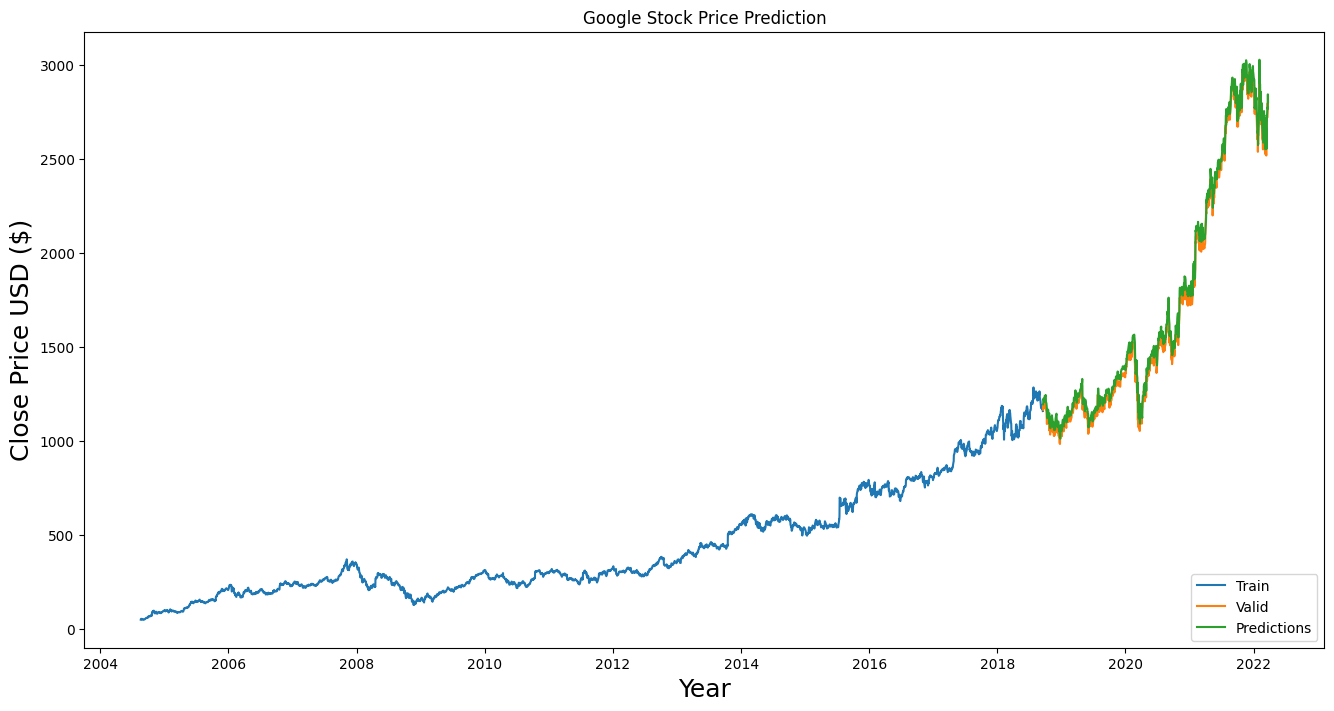

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Google Stock Price Prediction')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [24]:
print(rmse)

49.151383720912015


### THANK YOU